## Kaggle Data Set - Credit Card Fraud
### The datasets contains transactions made by credit cards in September 2013 by european cardholders. 
## Dataset Information:
    * Number of Instances: 284,807
    * Number of Attributes: 31 (including the class attribute)
    * Attribute Information:
    * Features V1, V2, ... V28 are the principal components obtained with PCA.    
    * The only features which have not been transformed with PCA are 'Time' and 'Amount'.
    * Feature 'Time' contains the seconds elapsed between each transaction and the first 
      transaction in the   dataset.
### Class (class attribute):
    * Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 
      otherwise. 
      1 = Fraud Transaction
      0 = Normal Transaction
### All the remaining details regarding the data set can be found in the below link.
### [CreditCardFraud](https://www.kaggle.com/mlg-ulb/creditcardfraud/data)

In [5]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

In [6]:
#download the data set from  
#https://www.kaggle.com/dalpozz/creditcardfraud/data
# load the data set
data=pd.read_csv("creditcard.csv")

In [7]:
data.shape

(284807, 31)

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## UnderSampling the DataSet to apply t-SNE

### Approach:
### UnderSampling the data to nearly imbalanced and balanced datasets seperately to apply tsne.





### 1) Applied t-SNE to Nearly Balanced DataSet by UnderSampling under different parameters of t-SNE.



In [9]:
# underSampleRatio -> fraud/normal
def UnderSampleData(data,underSampleRatio):

    # Number of data points in the minority class
    fraudrecords = len(data[data.Class == 1])
    fraudindices = np.array(data[data.Class == 1].index)
    # Picking the indices of the normal classes
    normalindices = data[data.Class == 0].index
    
    samples=(fraudrecords)/underSampleRatio
    
    randomnormalindices = np.random.choice(normalindices, int(samples), replace = False)
    randomnormalindices = np.array(randomnormalindices)

    # Appending the 2 indices
    undersampleindices = np.concatenate([fraudindices,randomnormalindices])

    # Under sample dataset
    undersampledata = data.iloc[undersampleindices,:]
    return undersampledata

In [10]:
def standardize(X):
    # Data-preprocessing: Standardizing the data
    from sklearn.preprocessing import StandardScaler
    standardized_data = StandardScaler().fit_transform(X)
    ## stddata - data which is standardized
    stddata = pd.DataFrame(standardized_data, columns = X.columns)
    return stddata

In [11]:
def TSNEModel(perplexity,iterations,sampledata):
    from sklearn.manifold import TSNE
    model = TSNE(n_components=2, random_state=0,perplexity=perplexity,n_iter=iterations)
    # save the labels into a variable y.
    y = sampledata['Class']
    # Drop the label feature,store the  data in X.
    X = sampledata.drop("Class",axis=1)
    # creating a new data frame which help us in ploting the result data
    tsne_data = model.fit_transform(X) 
    tsne_data = np.vstack((tsne_data.T, y)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
    # Ploting the result of tsne
    sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    str="With perplexity = {0}, n_iter = {1}".format(perplexity, iterations)
    plt.title(str)   
    plt.show()

In [12]:
# Standardize the dataSet
# save the labels into a variable y.
y = data['Class']
# Drop the label feature, standardize the data and store the  data in X.
X = standardize(data.drop("Class",axis=1))
stddata = pd.concat([X, y], axis=1)


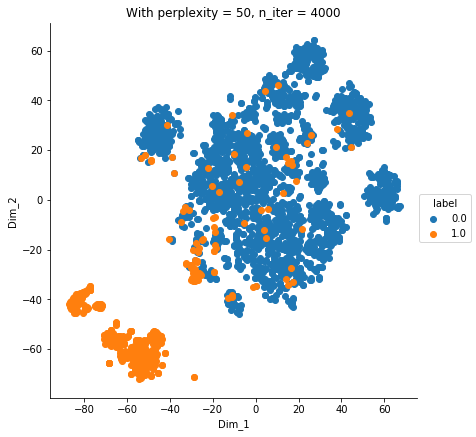

In [20]:
ImbalanceSample=UnderSampleData(stddata,0.2)  ## sample the unbalanced dataset in to nearly imbalance
TSNEModel(50,4000,ImbalanceSample)

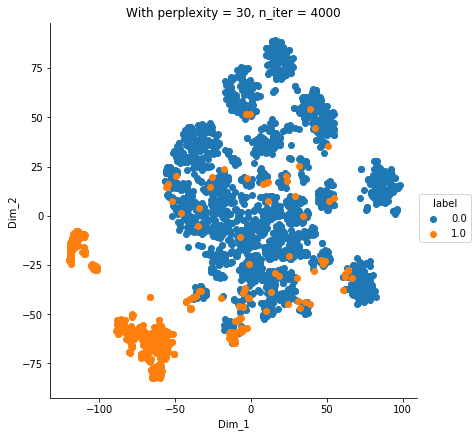

In [14]:
TSNEModel(30,4000,ImbalanceSample)

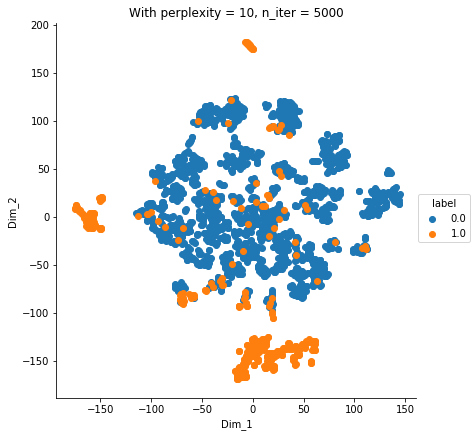

In [19]:
TSNEModel(10,5000,ImbalanceSample)

#### From the t-SNE plots, it seems fraud transactions are seperated from normal transactions more or less.

### 2) Applied t-SNE to perfectly Balanced Dataset by varying different parameters of t-SNE.

In [15]:
balanceSample=UnderSampleData(stddata,1)  ## sample the unbalanced dataset in to perfectly balance


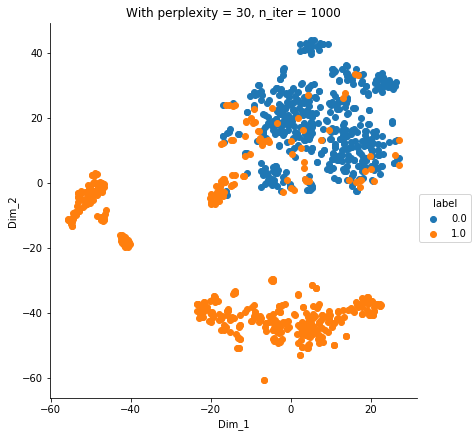

In [16]:
TSNEModel(30,1000,balanceSample)

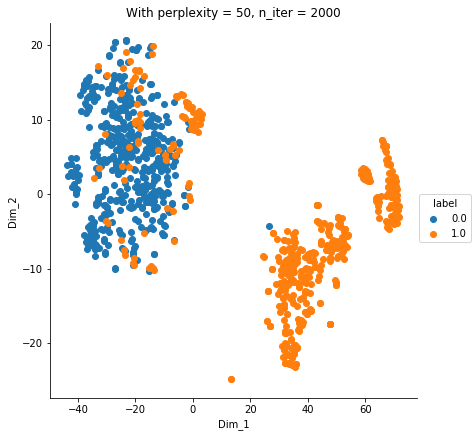

In [17]:
TSNEModel(50,4000,balanceSample)

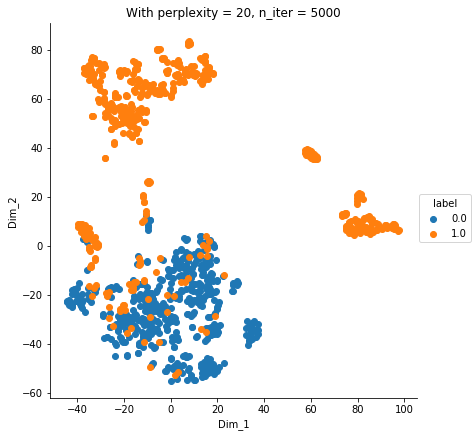

In [18]:
TSNEModel(20,5000,balanceSample)